 ## Exercise 1: Multivariate regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import utils

X = np.loadtxt('A2_datasets_2020/GPUbenchmark.csv', delimiter=',', usecols=(0,1,2,3,4,5))
y = np.loadtxt('A2_datasets_2020/GPUbenchmark.csv', delimiter=',', usecols=6)

to_predict = np.array([[1, 2432, 1607, 1683, 8, 8, 256]])
to_predict_2 = np.array([[2432, 1607, 1683, 8, 8, 256]])

 Function to plot the normalized values and make shore that each Xi is centralized around zero

In [2]:
def plot_cols(Xn):
    plt.figure(figsize=(15,8))
    for i in range(1, 7):
        plt.subplot(2, 3, i)
        for j in range(len(Xn)):
            plt.scatter(Xn[j][i - 1], y[j])
    plt.suptitle('GPU benchmark')
    plt.show()

 Normalize values in X and plot Xn. Normalization is done to speed up the calculation in gradient decent

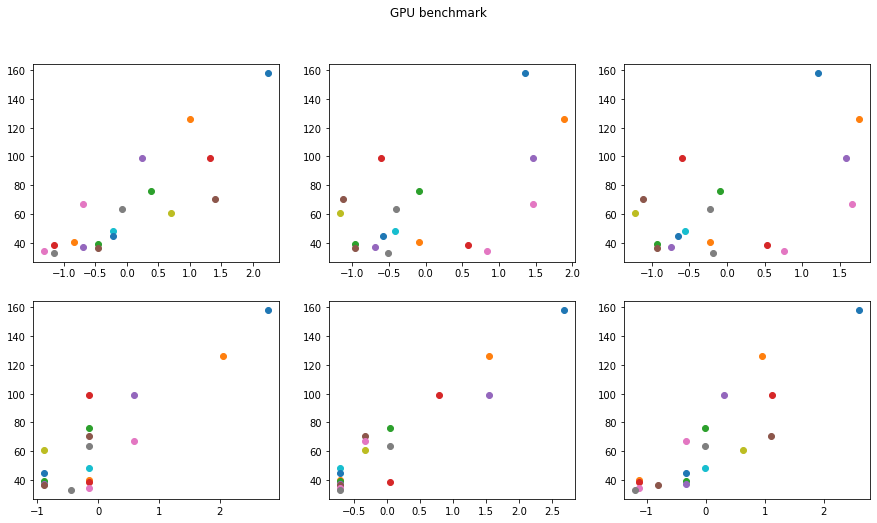

In [3]:
Xn = utils.normalize_matrix(X)
plot_cols(Xn)

 Extend Xn and X.
 Xne to use with the gradient decent function and Xe to use with the normal equation function

In [4]:
Xne = utils.extend_matrix(Xn)
Xe = utils.extend_matrix(X)

 Calculate beta using the normal equation, calculating the cost J(beta) and make prediction with model

In [5]:
beta = utils.normal_equation(Xe, y)
J = utils.cost_function(Xe, y, beta)
normal_equation_result = to_predict.dot(beta)

 Normalizing of given graphic card values (not extended) and extend the normalized values
 to use with the gradient decent function. Normalization is done to speed up the calculation in gradient decent

In [6]:
normalized_predict = utils.normalize_matrix_with_value(X, to_predict_2)
normalized_predict_Xe = utils.extend_matrix(normalized_predict)

 Calculate beta using Gradient decent, calculating the cost J(beta) and make predicition with model

In [7]:
beta_gradian = utils.gradient_decent(Xne, y, 7500, 0.01)
J_gradiant = utils.cost_function(Xne, y, beta_gradian)
gradiant_decent_result = normalized_predict_Xe.dot(beta_gradian)

Round the results to three decimals, the benchmarks in y has one decimal but to tune the alfa and number of iterations in gradient decent it is more interesting to see at least three decimals.

In [8]:
normal_equation_result_round = round(np.sum(normal_equation_result), 3)
gradiant_decent_result_round = round(np.sum(gradiant_decent_result), 3)
print('Benchmark result using the normal equation (non-normalized values):', normal_equation_result_round)
print('The cost J(beta) when using the normal equation:', round(J, 3))
print('Benchmark result using the gradient decent (normalized values):', gradiant_decent_result_round)
print('The cost J(beta) using gradient decent (normalized values):',round(J_gradiant, 3))

Benchmark result using the normal equation (non-normalized values): 110.804
The cost J(beta) when using the normal equation: 12.396
Benchmark result using the gradient decent (normalized values): 110.804
The cost J(beta) using gradient decent (normalized values): 12.396


 7500 iteration results in an exact result(using three decimals) from the gradient decent and the normal equation
 The result is as seen 1% within the the final cost for the normal equation